In [1]:
import os
import warnings
import glob
import pickle
import numpy as np
from scipy import io
from mne.viz import plot_topomap
from matplotlib import colors, cm, gridspec, pyplot as plt

plt.style.use("seaborn-dark")
plt.rcParams.update({"xtick.labelsize": 15, "ytick.labelsize": 15})

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [2]:
CAF_DOSE = 200 # the caffeine dose in mg (200 or 400)
AGE_GROUP = -1 # -1: all, 0: up to age 30, 1: from age 30

SIGNIFICANT_P = 0.05 # weak significance threshold (grey dots)
SIGNIFICANT_P_STRONG = 0.01 # strong significance threshold (white dots)

PROJECT_PATH = "../data" # path to where the EEG sensor position file is stored
STATS_RESULTS_PATH = "../results/final/statistics200" # directory where statistics results are stored
FOOOF_RESULTS_PATH = "../results/final/fooof200" # directory where single feature ML results are stored
FIGURE_PATH = "../figures" # directory where the figures are saved

STAGES = ["NREM", "REM"] # sleep stages to include in the figure
BANDS = ["delta", "theta", "alpha", "sigma", "beta", "low gamma"] # frequency bands to include in the figure

In [3]:
# load fitted FOOOF models
with open(os.path.join(FOOOF_RESULTS_PATH, "fooof.pkl"), "rb") as f:
    fm = pickle.load(f)
    fm_caf_chs = fm["CAF"]
    fm_plac_chs = fm["PLAC"]

In [4]:
# load EEG sensor positions to be used in the topomaps
sensor_pos = io.loadmat(os.path.join(PROJECT_PATH, "Coo_caf"))["Cor"].T
sensor_pos = np.array([sensor_pos[1], sensor_pos[0]]).T

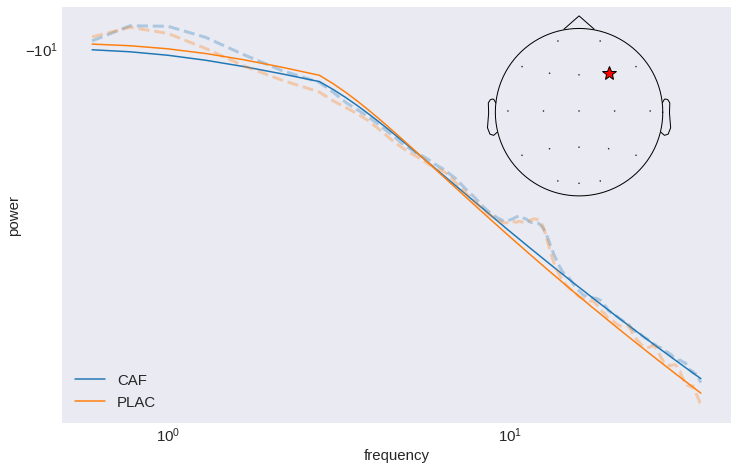

In [6]:
fontsize_small = 15
fontsize_big = 20

ch_idx = 3
fm_caf = fm_caf_chs[ch_idx]
fm_plac = fm_plac_chs[ch_idx]

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(12, 7))

ax = fig.add_subplot(gs[:,:])

ax.plot(fm_caf.freqs, fm_caf._ap_fit, label="CAF", color="C0")
ax.plot(
    fm_caf.freqs,
    fm_caf.power_spectrum,
    color="C0",
    linestyle="--",
    linewidth=3,
    alpha=0.3,
)

ax.plot(fm_plac.freqs, fm_plac._ap_fit, label="PLAC", color="C1")
ax.plot(
    fm_plac.freqs,
    fm_plac.power_spectrum,
    color="C1",
    linestyle="--",
    linewidth=3,
    alpha=0.3,
)

ax.set_xscale("symlog")
ax.set_yscale("symlog")
ax.set_xlabel("frequency", fontsize=fontsize_small)
ax.set_ylabel("power", fontsize=fontsize_small)
ax.legend(fontsize=fontsize_small, loc="lower left")

ax_topo = fig.add_subplot(gs[0,1])
topo_mask = np.zeros(20, dtype=bool)
topo_mask[ch_idx] = True
plot_topomap(np.zeros(20), sensor_pos, mask=topo_mask, cmap=colors.ListedColormap((0, 0, 0, 0)),
             mask_params=dict(marker="*", markersize=15, markerfacecolor="red"))

plt.show()